In [1]:
import numpy as np # import numpy
import pandas as pd # import pandas
import zipfile # import 解zip壓縮檔
import glob
import os
import seaborn as sns
folders='/home/jovyan/at082-group10/nathan/For_AIA_0916_1018_Sample'
all_data=pd.DataFrame()

In [2]:
#read all csv data
for folders in glob.glob('/home/jovyan/at082-group10/nathan/For_AIA_0916_1018_Sample/IP*/*'):
    for file in glob.glob(folders+'/FeatureNEW/'):
        
        for filename in os.listdir(file):
            if (os.path.splitext(filename)[-1]=='.csv'): # only read 副檔為csv
                #print(os.path.join(file,filename))
                #print(file.split('/')[7])
                if(file.split('/')[6]=='IP17' or file.split('/')[6]=='IP18' or file.split('/')[6]=='IP19'):
                    
                    temp_pd=pd.read_csv(os.path.join(file,filename))
                    temp_pd.insert(0,column="machiine",value=file.split('/')[6]) # 新增機台欄位
                    if(all_data is None):
                        all_data=temp_pd
                    else :
                        all_data=pd.concat([all_data,temp_pd],axis=0, ignore_index=True)
            else :
                next
            

In [3]:
la_t=[]

from datetime import datetime, timedelta
for i in range(len(all_data)):
    if (datetime.strptime((all_data['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-16 04:00',"%Y-%m-%d %H:%M")>timedelta(minutes=0)):
        if(all_data['machiine'][i]=='IP17'):
            la_t.append('1')
        else:
            la_t.append('0')
    else:
        la_t.append('0')
        
#all_data=pd.concat([all_data,la_t],axis=0, ignore_index=True)

In [4]:
df = pd.DataFrame(la_t, columns = ['lab'])

In [5]:
all_data=pd.concat([all_data,df],axis=1)

In [6]:
test=pd.DataFrame()
temp_pd2=pd.DataFrame()

In [7]:
#read all csv data
for folders in glob.glob('/home/jovyan/at082-group10/For_AIA_1019_1029/IP*/*'):
    #print("1")
    for file in glob.glob(folders+'/FeatureNEW/'):
        #print('2')
        for filename in os.listdir(file):
            #print('3')
            if (os.path.splitext(filename)[-1]=='.csv'): # only read 副檔為csv
                #print('4')
                #print(os.path.join(file,filename))
                #print(file.split('/')[7])
               
                if(file.split('/')[5]=='IP17' or file.split('/')[5]=='IP18' or file.split('/')[5]=='IP19'):
                    #print('5')
                    temp_pd2=pd.read_csv(os.path.join(file,filename))
                    temp_pd2.insert(0,column="machiine",value=file.split('/')[5]) # 新增機台欄位
                    
                    if(test is None):
                        test=temp_pd2
                    else :
                        test=pd.concat([test,temp_pd2],axis=0, ignore_index=True)
            else :
                next
            

In [8]:
la_t=[]

from datetime import datetime, timedelta
for i in range(len(test)):
    if(test['machiine'][i]=='IP17'):
        if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 15:00',"%Y-%m-%d %H:%M")>timedelta(minutes=0)):
            if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 17:11',"%Y-%m-%d %H:%M")<timedelta(minutes=0)):
                la_t.append('1')
            else:
                 la_t.append('0')
        else:
             la_t.append('0')
    elif (test['machiine'][i]=='IP18'):
        if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 11:00',"%Y-%m-%d %H:%M")>timedelta(minutes=0)):
                if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 13:40',"%Y-%m-%d %H:%M")<timedelta(minutes=0)):
                    la_t.append('1')
                else:
                    la_t.append('0')
        else:
             la_t.append('0')
    else:
        if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 11:16',"%Y-%m-%d %H:%M")>timedelta(minutes=0)):
            if (datetime.strptime((test['DateTime'][i][:16]),"%Y-%m-%d  %H:%M")-datetime.strptime('2019-10-29 14:32',"%Y-%m-%d %H:%M")<timedelta(minutes=0)):
                 la_t.append('1')
            else:
                 la_t.append('0')
        else:
               la_t.append('0')
            
     #test=pd.concat([test,la_t],axis=0, ignore_index=True)

In [9]:
df2 = pd.DataFrame(la_t, columns = ['lab'])

In [10]:
test=pd.concat([test,df2],axis=1)

In [11]:
IP17=all_data[all_data['machiine']=='IP17']
IP18=all_data[all_data['machiine']=='IP18']
IP19=all_data[all_data['machiine']=='IP19']

In [12]:
IP17_FOURIER=IP17.iloc[:,63:]
IP18_FOURIER=IP18.iloc[:,63:]
IP19_FOURIER=IP19.iloc[:,63:]

In [13]:
IP17t=test[test['machiine']=='IP17']
IP18t=test[test['machiine']=='IP18']
IP19t=test[test['machiine']=='IP19']

In [14]:
IP17t_FOURIER=IP17t.iloc[:,63:]
IP18t_FOURIER=IP18t.iloc[:,63:]
IP19t_FOURIER=IP19t.iloc[:,63:]

In [15]:
X_t7=IP17t_FOURIER.drop(columns='lab')
y_t7=IP17t_FOURIER['lab']
X_t8=IP18t_FOURIER.drop(columns='lab')
y_t8=IP18t_FOURIER['lab']
X_t9=IP19t_FOURIER.drop(columns='lab')
y_t9=IP19t_FOURIER['lab']
X_7=IP17_FOURIER.drop(columns='lab')
y_7=IP17_FOURIER['lab']
X_8=IP18_FOURIER.drop(columns='lab')
y_8=IP18_FOURIER['lab']
X_9=IP19_FOURIER.drop(columns='lab')
y_9=IP19_FOURIER['lab']

In [16]:
IP17_nan=IP17.iloc[:,3:63]
IP18_nan=IP18.iloc[:,3:63]
IP19_nan=IP19.iloc[:,3:63]
IP17t_nan=IP17t.iloc[:,3:63]
IP18t_nan=IP18t.iloc[:,3:63]
IP19t_nan=IP19t.iloc[:,3:63]

In [25]:
y=pd.concat([y_7,y_8,y_9,y_t7,y_t8,y_t9],axis=0,ignore_index=True)
X=pd.concat([X_7,X_8,X_9,X_t7,X_t8,X_t9],axis=0,ignore_index=True)
X_N=pd.concat([IP17_nan,IP17t_nan,IP18_nan,IP18t_nan,IP19_nan,IP19t_nan],axis=0,ignore_index=True)


In [18]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [19]:
TEMP_X=pd.concat([X,y],axis=1,ignore_index=False)
TEMP_Xn=pd.concat([X_N,y],axis=1,ignore_index=False)

In [20]:
X_OK=TEMP_X[TEMP_X['lab']=='0']
X_NG=TEMP_X[TEMP_X['lab']=='1']
XN_OK=TEMP_Xn[TEMP_Xn['lab']=='0']
XN_NG=TEMP_Xn[TEMP_Xn['lab']=='1']

In [26]:
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define

X=X
y=y
eval_set =  [(X, y)]
#model = XGBClassifier()
model=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
     gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
     min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
     objective='binary:logistic', reg_alpha=0, reg_lambda=1,
      seed=0, silent=True, subsample=1)
model.fit(X, y,early_stopping_rounds=50, eval_metric="auc",eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.900416
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.916767
[2]	validation_0-auc:0.918032
[3]	validation_0-auc:0.919025
[4]	validation_0-auc:0.924869
[5]	validation_0-auc:0.928145
[6]	validation_0-auc:0.929326
[7]	validation_0-auc:0.932737
[8]	validation_0-auc:0.932967
[9]	validation_0-auc:0.934915
[10]	validation_0-auc:0.937436
[11]	validation_0-auc:0.93886
[12]	validation_0-auc:0.941085
[13]	validation_0-auc:0.943371
[14]	validation_0-auc:0.944436
[15]	validation_0-auc:0.94594
[16]	validation_0-auc:0.947016
[17]	validation_0-auc:0.947102
[18]	validation_0-auc:0.951164
[19]	validation_0-auc:0.952901
[20]	validation_0-auc:0.954356
[21]	validation_0-auc:0.957942
[22]	validation_0-auc:0.958645
[23]	validation_0-auc:0.960085
[24]	validation_0-auc:0.961543
[25]	validation_0-auc:0.962524
[26]	validation_0-auc:0.963815
[27]	validation_0-auc:0.964535
[28]	validation_0-auc:0.965533
[29]	validation_0-auc:0.966508
[30]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [22]:
from xgboost import plot_importance

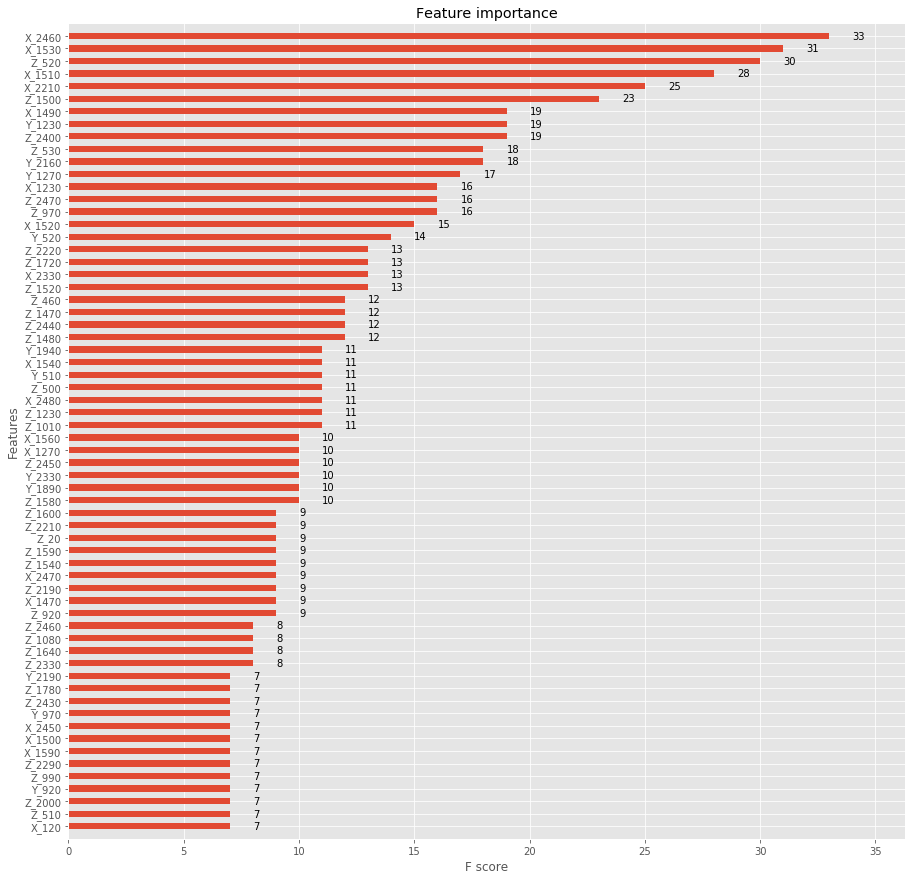

In [27]:
from xgboost import plot_importance
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(15,15))

plot_importance(model,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()

In [28]:
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define

X=X_N
y=y
eval_set =  [(X, y)]
#model = XGBClassifier()
model=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
     gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
     min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
     objective='binary:logistic', reg_alpha=0, reg_lambda=1,
      seed=0, silent=True, subsample=1)
model.fit(X, y,early_stopping_rounds=50, eval_metric="auc",eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.869405
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.880214
[2]	validation_0-auc:0.880591
[3]	validation_0-auc:0.884025
[4]	validation_0-auc:0.885599
[5]	validation_0-auc:0.886003
[6]	validation_0-auc:0.888968
[7]	validation_0-auc:0.889802
[8]	validation_0-auc:0.890047
[9]	validation_0-auc:0.890163
[10]	validation_0-auc:0.890804
[11]	validation_0-auc:0.892846
[12]	validation_0-auc:0.893032
[13]	validation_0-auc:0.90261
[14]	validation_0-auc:0.902952
[15]	validation_0-auc:0.903434
[16]	validation_0-auc:0.906316
[17]	validation_0-auc:0.9069
[18]	validation_0-auc:0.907384
[19]	validation_0-auc:0.908098
[20]	validation_0-auc:0.909564
[21]	validation_0-auc:0.910399
[22]	validation_0-auc:0.910489
[23]	validation_0-auc:0.910908
[24]	validation_0-auc:0.911692
[25]	validation_0-auc:0.912033
[26]	validation_0-auc:0.913023
[27]	validation_0-auc:0.914193
[28]	validation_0-auc:0.914704
[29]	validation_0-auc:0.915212
[30]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

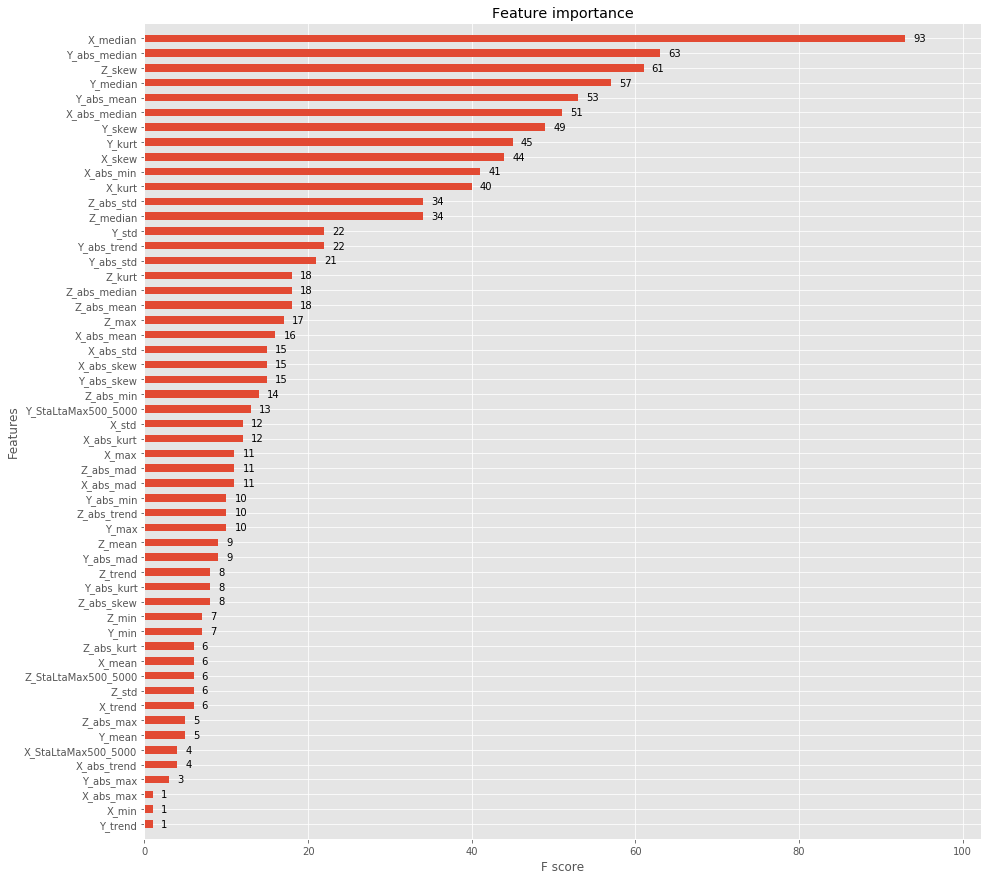

In [33]:
from xgboost import plot_importance
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(15,15))

plot_importance(model,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()